# Modified Kinetic Energy for 1D Harmonic Oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from module.hamilton_class import HamiltonSystem
from module.plot_class import Plotter
from module.sampling import metropolis_hastings, sample_initial_conditions


# General parameters for different kinds of dynamics
k = 100.0 # spring constant
m = 1.0 # mass
t_max = 30.0 # maximum time

potential = lambda x: k * (x**2) / 2

### Derivatives

In [2]:
# Hamiltonian 1
# H = p^2 / 2m + kx^2 / 2
# x dot = dH / dp
# p dot = - dH / dx

def H1_x_dot(x, p):
    return p / m  

def H1_p_dot(x, p):
    return -k * x 

def H1_H(x, p):
    return 0.5 * (p**2) / m + k * (x**2) / 2

# Hamiltonian 2
# H = sqrt(p^2 + m^2) + kx^2 / 2
# x dot = dH / dp
# p dot = - dH / dx

def H2_x_dot(x, p):
    return p / np.sqrt(p**2 + m**2)

def H2_p_dot(x, p):
    return -k * x

def H2_H(x, p):
    return np.sqrt(p**2 + m**2) + k * (x**2) / 2


### Single initial condition, Hamiltonian 1

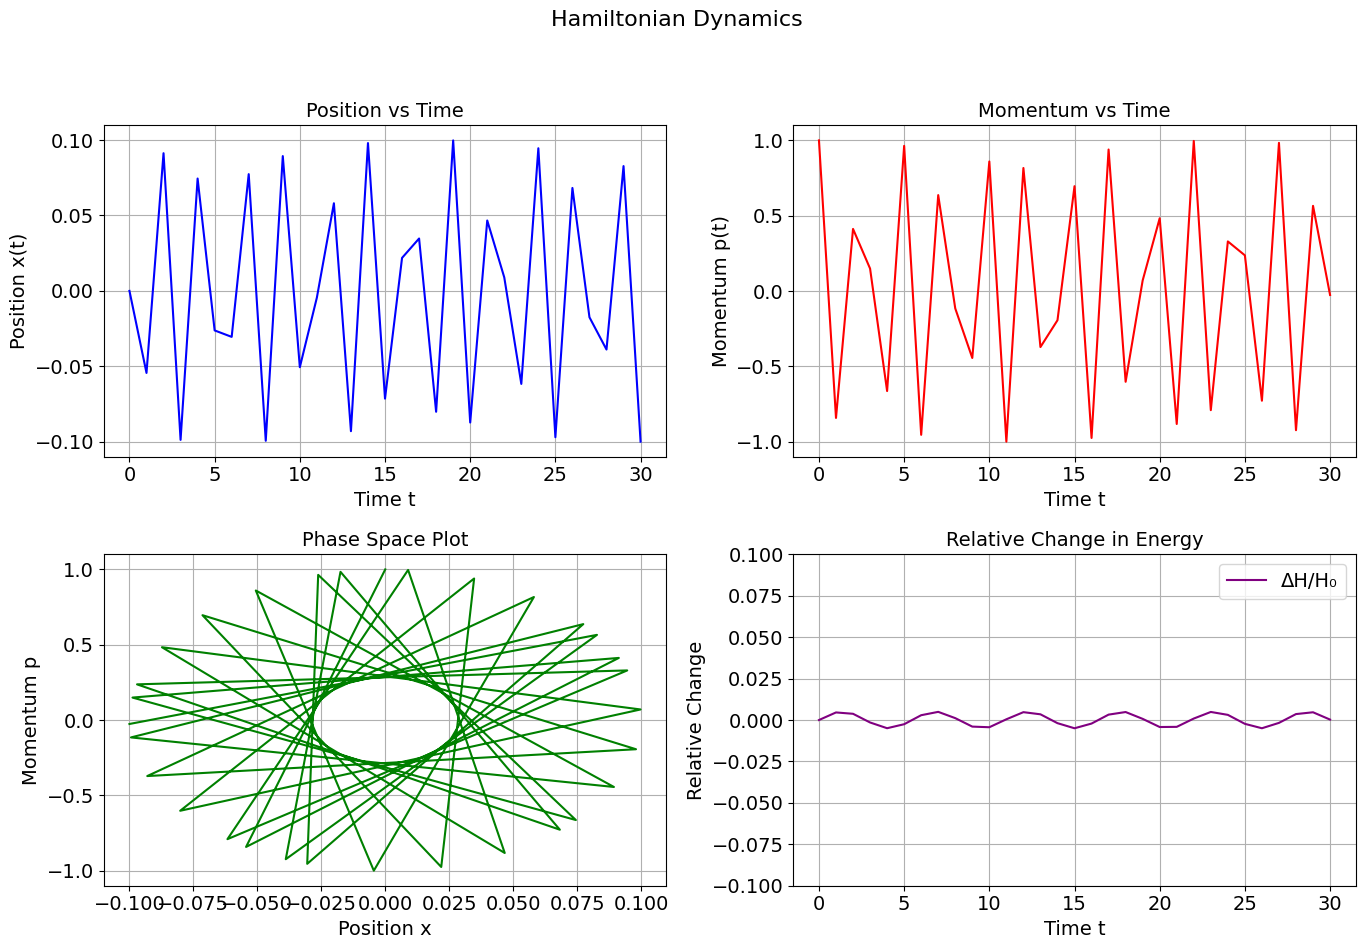

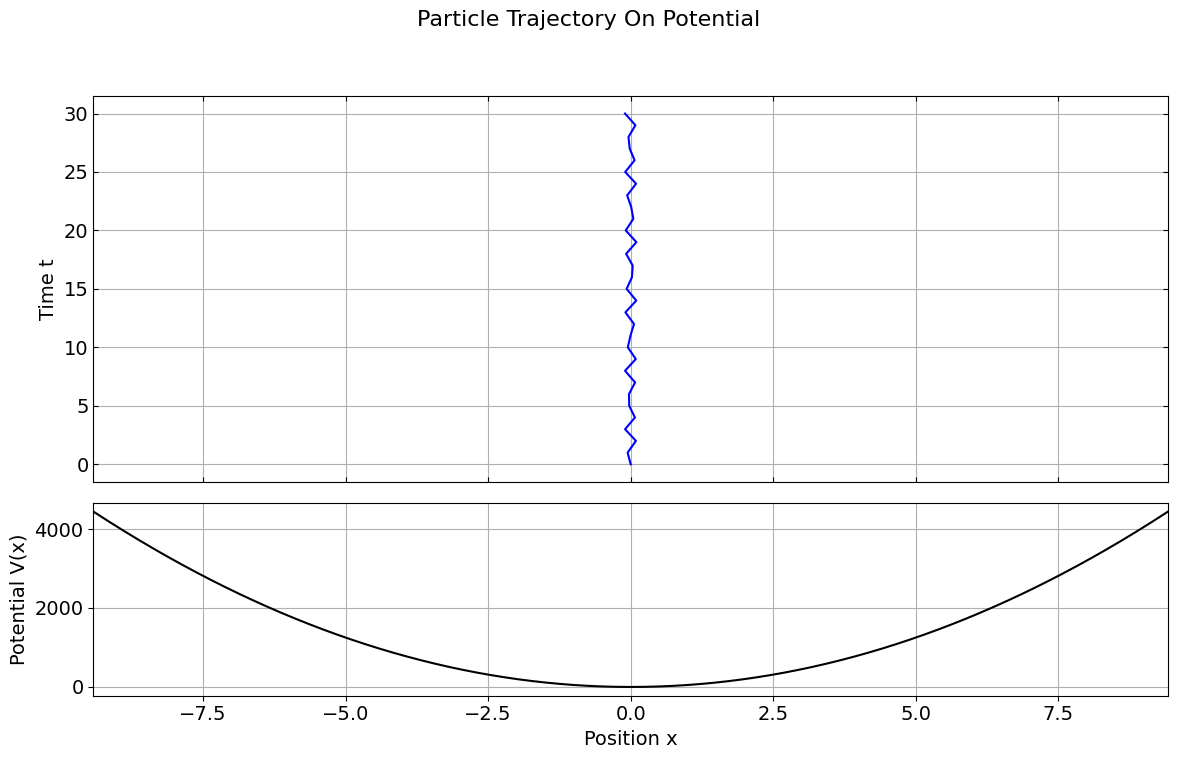

>>> Number of force calculation:  30000
>>> Maximum displacement:  0.09988295551533921


In [3]:
# Define the parameters
delta_t = 0.001  # Time step
N_force = 0  # Number of force calculation

# Fixed initial condition
x0, p0 = 0.0, 1.0

# Create Hamiltonian system
hamilton_system = HamiltonSystem(H1_p_dot, H1_x_dot, t_max, delta_t)

# Simulate for the fixed initial condition
t_array, x_array, p_array = hamilton_system.simulate(x0, p0)
N_force += len(t_array) - 1 # each time of simulate includes a dV / dx calculation

# Pick the data at each second
t_sampled, x_sampled, p_sampled = hamilton_system.pick_data(t_array, x_array, p_array)

# Calculate energy
energy_sampled = H1_H(x_sampled, p_sampled)

# Plotting
plotter = Plotter()
plotter.static_plots("Hamiltonian", t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

print(">>> Number of force calculation: ", N_force)
print(">>> Maximum displacement: ", (np.max(x_sampled) - np.min(x_sampled)) / 2)


### Single initial condition, Hamiltonian 2

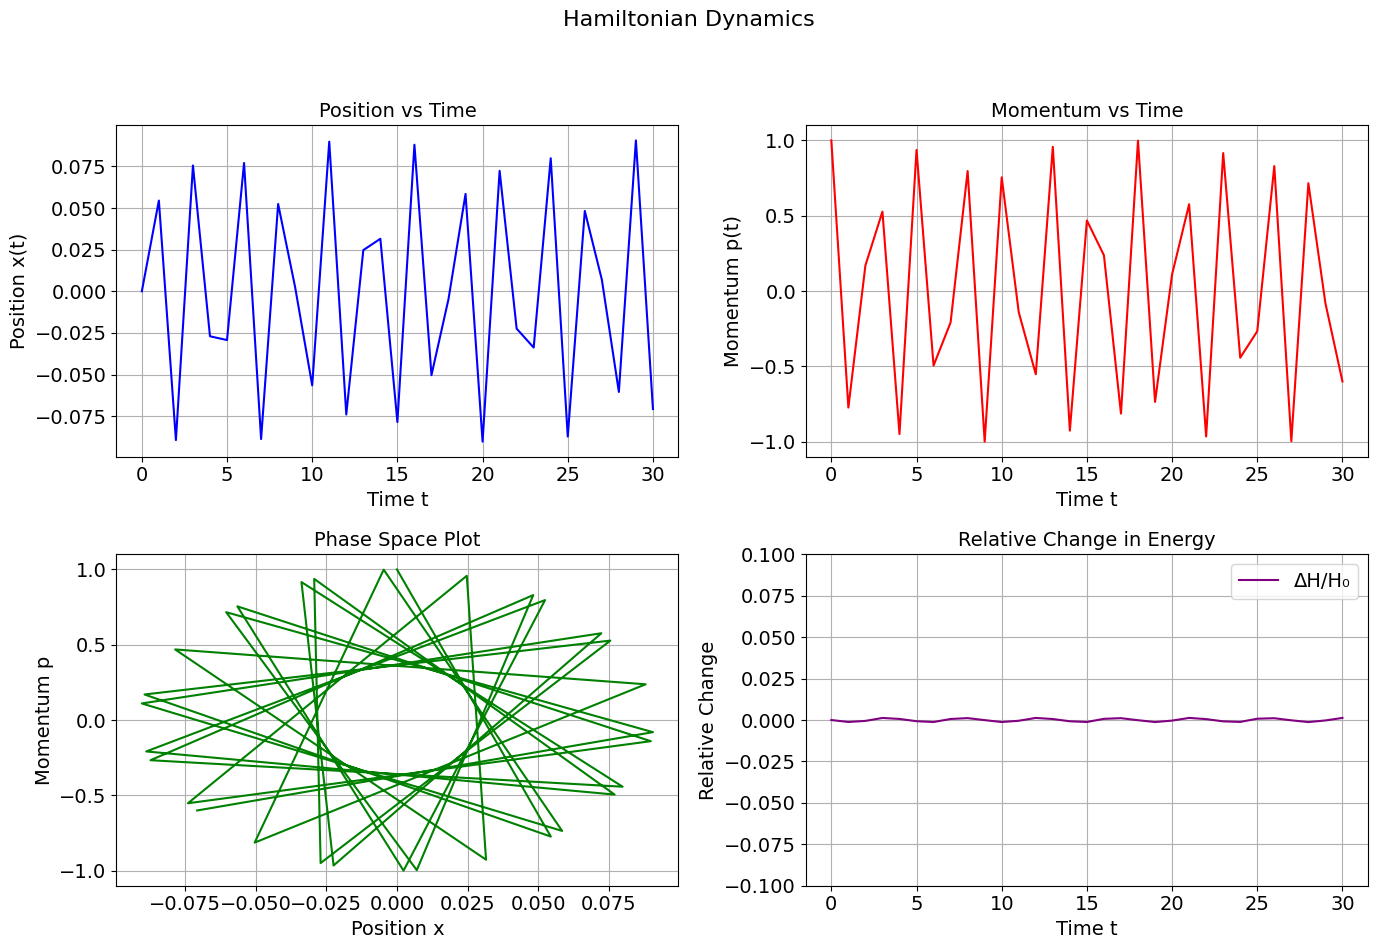

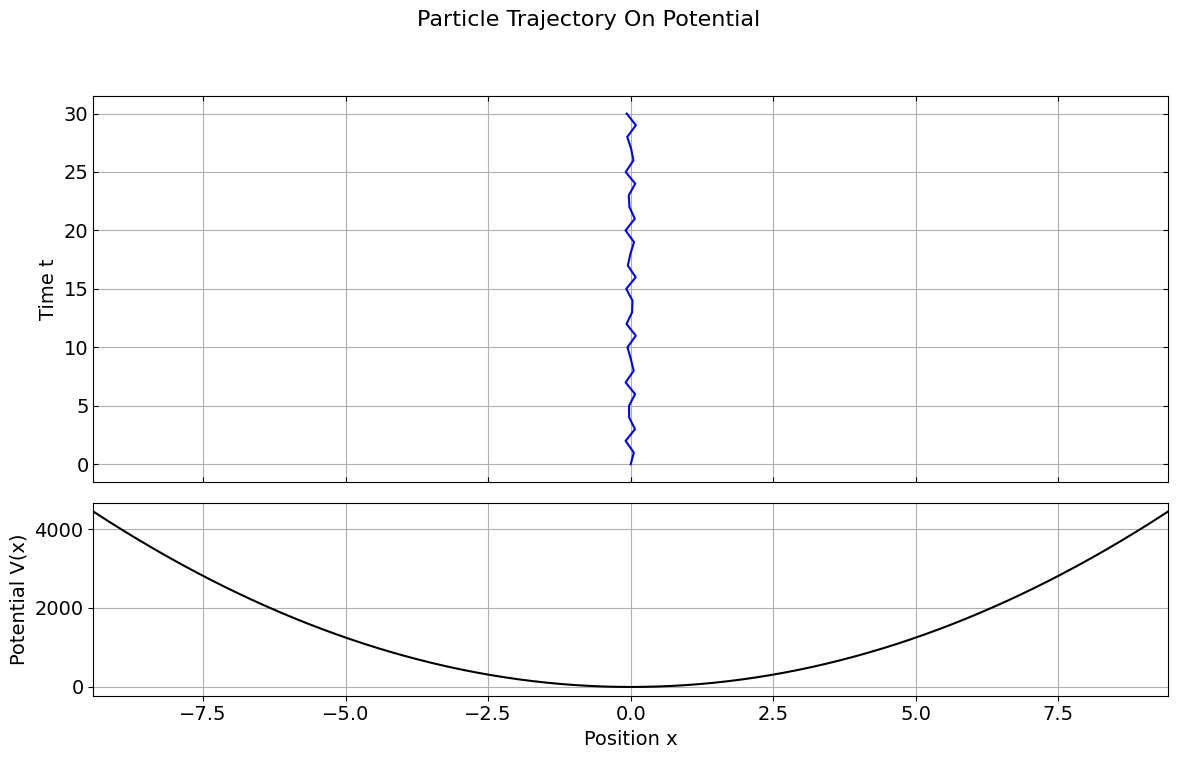

>>> Number of force calculation:  30000
>>> Maximum displacement:  0.09045880251362784


In [4]:
# Define the parameters
delta_t = 0.001  # Time step
N_force = 0  # Number of force calculation

# Fixed initial condition
x0, p0 = 0.0, 1.0

# Create Hamiltonian system
hamilton_system = HamiltonSystem(H2_p_dot, H2_x_dot, t_max, delta_t)

# Simulate for the fixed initial condition
t_array, x_array, p_array = hamilton_system.simulate(x0, p0)
N_force += len(t_array) - 1 # each time of simulate includes a dV / dx calculation

# Pick the data at each second
t_sampled, x_sampled, p_sampled = hamilton_system.pick_data(t_array, x_array, p_array)

# Calculate energy
energy_sampled = H2_H(x_sampled, p_sampled)

# Plotting
plotter = Plotter()
plotter.static_plots("Hamiltonian", t_sampled, x_sampled, p_sampled, energy_sampled)
plotter.trajectory_plot(x_sampled, t_sampled, potential)

print(">>> Number of force calculation: ", N_force)
print(">>> Maximum displacement: ", (np.max(x_sampled) - np.min(x_sampled)) / 2)

### Sampling


>>> Generated 5000 sets of (p0) satisfies p(p0) ∝ exp(-H(p0))


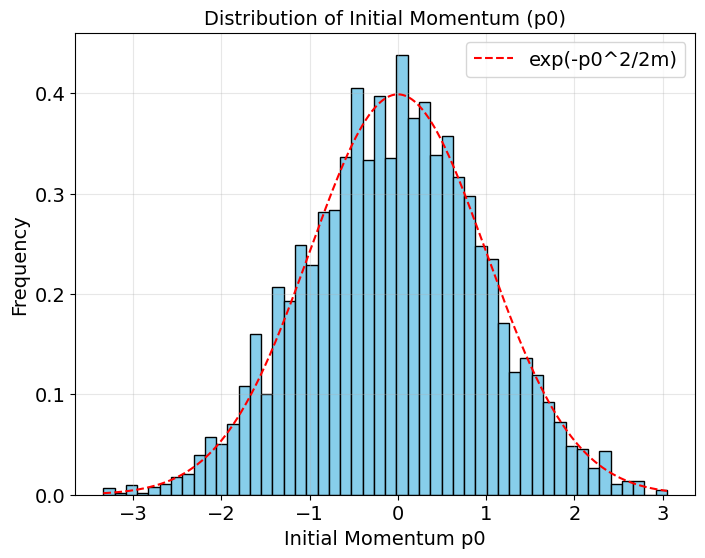

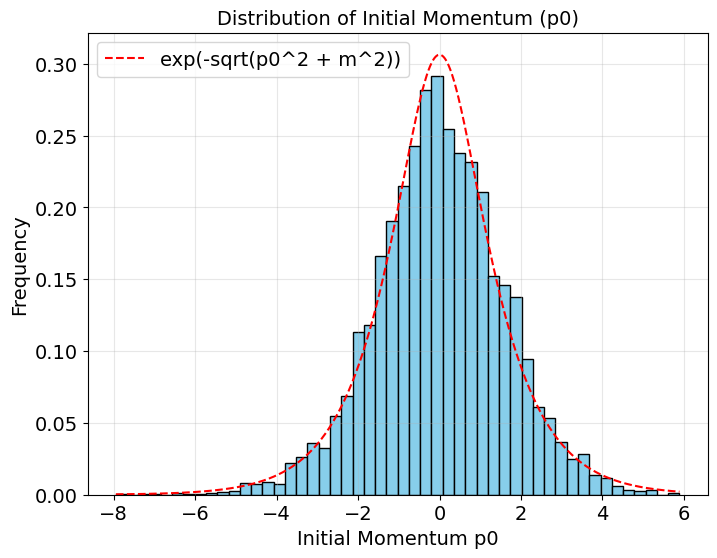

In [5]:
Nsamp = 5000
H1_p_term = lambda p: p**2 / (2 * m)
H2_p_term = lambda p: np.sqrt(p**2 + m**2)

H1_p0_samples = sample_initial_conditions(Nsamp, H1_p_term, r_term=None)
H2_p0_samples = sample_initial_conditions(Nsamp, H2_p_term, r_term=None)
print(f"\n>>> Generated {Nsamp} sets of (p0) satisfies p(p0) ∝ exp(-H(p0))")

# Create a histogram of H1_p0_samples
plt.figure(figsize=(8, 6))
plt.hist(H1_p0_samples, bins=50, color='skyblue', edgecolor='black', density=True)
# Add theoretical distribution line
x_range = np.linspace(min(H1_p0_samples), max(H1_p0_samples), 1000)
theoretical_dist = np.exp(-x_range**2 / 2 / m) / np.sqrt(2 * np.pi)  # Normalized Gaussian distribution
plt.plot(x_range, theoretical_dist, color='red', linestyle='--', label='exp(-p0^2/2m)')
plt.title("Distribution of Initial Momentum (p0)")
plt.xlabel("Initial Momentum p0")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Create a histogram of H2_p0_samples
plt.figure(figsize=(8, 6))
plt.hist(H2_p0_samples, bins=50, color='skyblue', edgecolor='black', density=True)
# Add theoretical distribution line
x_range = np.linspace(min(H2_p0_samples), max(H2_p0_samples), 1000)
theoretical_dist = np.exp(-np.sqrt(x_range**2 + m**2)) 
normalization = np.trapz(np.exp(-np.sqrt(x_range**2 + m**2)), x_range)
theoretical_dist /= normalization
plt.plot(x_range, theoretical_dist, color='red', linestyle='--', label='exp(-sqrt(p0^2 + m^2))')
plt.title("Distribution of Initial Momentum (p0)")
plt.xlabel("Initial Momentum p0")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Calculate the Pmax(x; x0)

>>> Using Hamiltonian 1: 


Loop in samples: 100%|██████████| 5000/5000 [01:46<00:00, 47.01it/s]
/tmp/ipykernel_1239638/4078163030.py:23: RuntimeWarning: invalid value encountered in divide
  theoretical_dist = 0.5 * np.sqrt(k / (2 * np.pi)) * x_range / np.sqrt(x_range**2 - x0**2) * np.exp(-k/2 * (x_range**2 - x0**2))


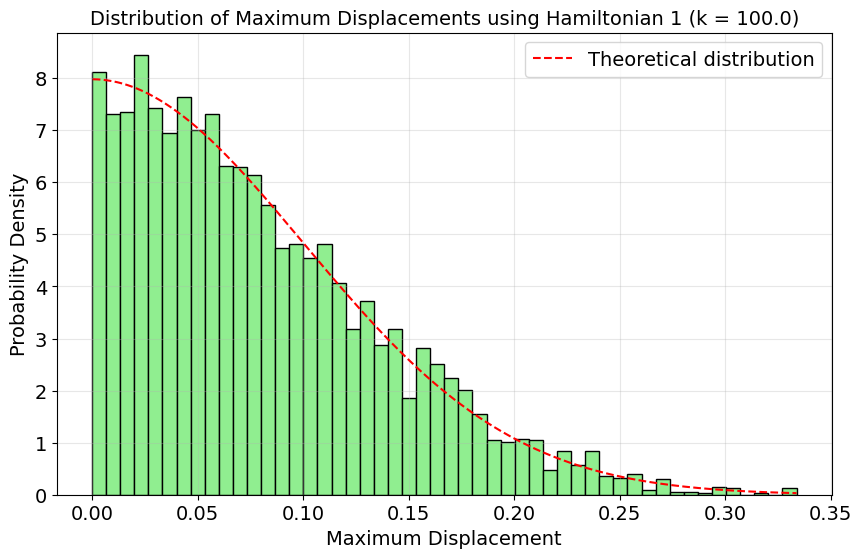

Average maximum displacement: 0.0803


In [6]:
print(">>> Using Hamiltonian 1: ")

# Define the parameters
delta_t = 0.001  # Time step

# Initial conditions
x0 = 0.0

hamilton_system = HamiltonSystem(H1_p_dot, H1_x_dot, t_max, delta_t)

displacement_ls = []
for p0 in tqdm(H1_p0_samples, desc="Loop in samples"):
    t_array, x_array, p_array = hamilton_system.simulate(x0, p0)
    displacement_ls.append((np.max(x_array) - np.min(x_array)) / 2)

# Create histogram of displacements
# * theoretical distribution is 1/2 * sqrt(k / (2 pi)) * x / sqrt(x^2 - x0^2) * exp(- k / 2 * (x^2 - x0^2))
plt.figure(figsize=(10, 6))
plt.hist(displacement_ls, bins=50, color='lightgreen', edgecolor='black', density=True)

# Calculate theoretical distribution
x_range = np.linspace(0, max(displacement_ls), 1000)
theoretical_dist = 0.5 * np.sqrt(k / (2 * np.pi)) * x_range / np.sqrt(x_range**2 - x0**2) * np.exp(-k/2 * (x_range**2 - x0**2))

# Normalize theoretical distribution
theoretical_dist_normalized = theoretical_dist * 4

# Plot theoretical distribution
plt.plot(x_range, theoretical_dist_normalized, 
         color='red', linestyle='--', label='Theoretical distribution')
plt.legend()

plt.title(f"Distribution of Maximum Displacements using Hamiltonian 1 (k = {k})")
plt.xlabel("Maximum Displacement")
plt.ylabel("Probability Density")
plt.grid(True, alpha=0.3)
plt.show()


# Calculate and print the average maximum displacement
avg_max_displacement = np.mean(displacement_ls)
print(f"Average maximum displacement: {avg_max_displacement:.4f}")


>>> Using Hamiltonian 2: 


Loop in samples: 100%|██████████| 5000/5000 [03:25<00:00, 24.29it/s]
/tmp/ipykernel_1239638/3839542161.py:22: RuntimeWarning: invalid value encountered in divide
  theoretical_dist = 0.5 * np.sqrt(k / (2 * np.pi)) * x_range / np.sqrt(x_range**2 - x0**2) * np.exp(-k/2 * (x_range**2 - x0**2))


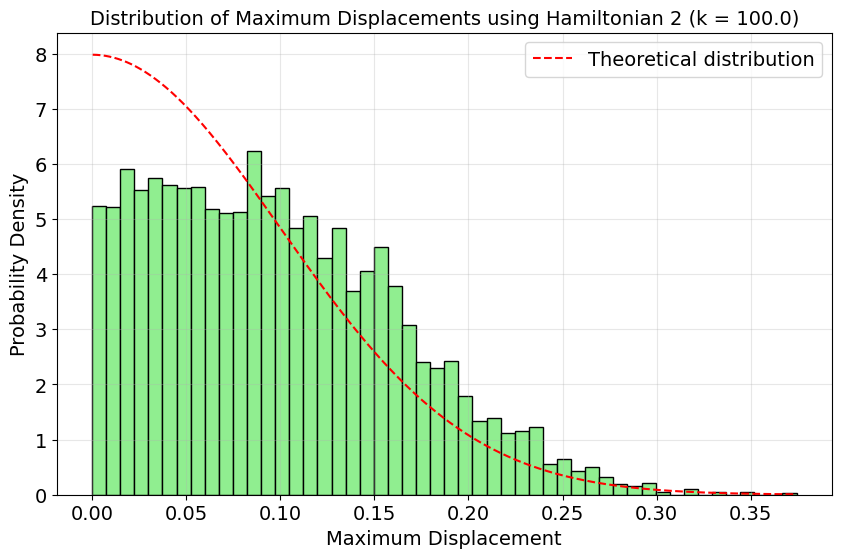

Average maximum displacement: 0.0985


In [7]:
print(">>> Using Hamiltonian 2: ")

# Define the parameters
delta_t = 0.001  # Time step

# Initial conditions
x0 = 0.0

hamilton_system = HamiltonSystem(H2_p_dot, H2_x_dot, t_max, delta_t)

displacement_ls = []
for p0 in tqdm(H2_p0_samples, desc="Loop in samples"):
    t_array, x_array, p_array = hamilton_system.simulate(x0, p0)
    displacement_ls.append((np.max(x_array) - np.min(x_array)) / 2)

# Create histogram of displacements
plt.figure(figsize=(10, 6))
plt.hist(displacement_ls, bins=50, color='lightgreen', edgecolor='black', density=True)

# Calculate theoretical distribution
x_range = np.linspace(0, max(displacement_ls), 1000)
theoretical_dist = 0.5 * np.sqrt(k / (2 * np.pi)) * x_range / np.sqrt(x_range**2 - x0**2) * np.exp(-k/2 * (x_range**2 - x0**2))

# Normalize theoretical distribution
theoretical_dist_normalized = theoretical_dist * 4

# Plot theoretical distribution
plt.plot(x_range, theoretical_dist_normalized, 
         color='red', linestyle='--', label='Theoretical distribution')
plt.legend()

plt.title(f"Distribution of Maximum Displacements using Hamiltonian 2 (k = {k})")
plt.xlabel("Maximum Displacement")
plt.ylabel("Probability Density")
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and print the average maximum displacement
avg_max_displacement = np.mean(displacement_ls)
print(f"Average maximum displacement: {avg_max_displacement:.4f}")


### Test